<a href="https://colab.research.google.com/github/sidmanale643/Heart-Disease-Prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.shape

(918, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
corr = df.corr()

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [ ]:
std_scaler = StandardScaler()
mm_scaler = StandardScaler()

In [ ]:
df['Age'] = std_scaler.fit_transform(df[['Age']])
df['RestingBP'] = std_scaler.fit_transform(df[['RestingBP']])
df['MaxHR'] = std_scaler.fit_transform(df[['MaxHR']])
df['Cholesterol'] = std_scaler.fit_transform(df[['Cholesterol']])
df['Oldpeak'] = std_scaler.fit_transform(df[['Oldpeak']])

<Axes: >

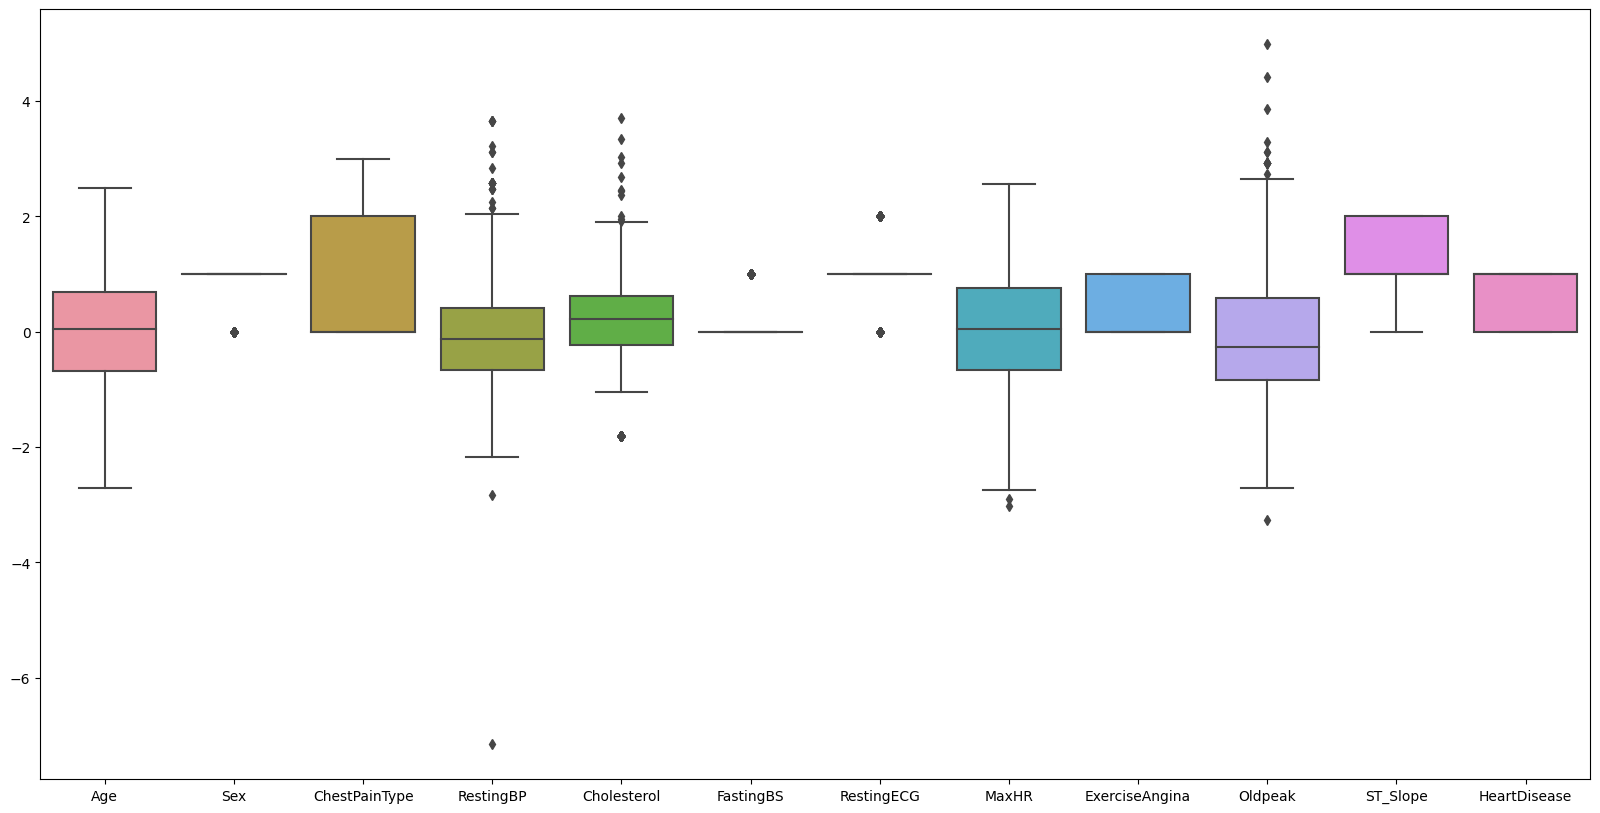

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(df)

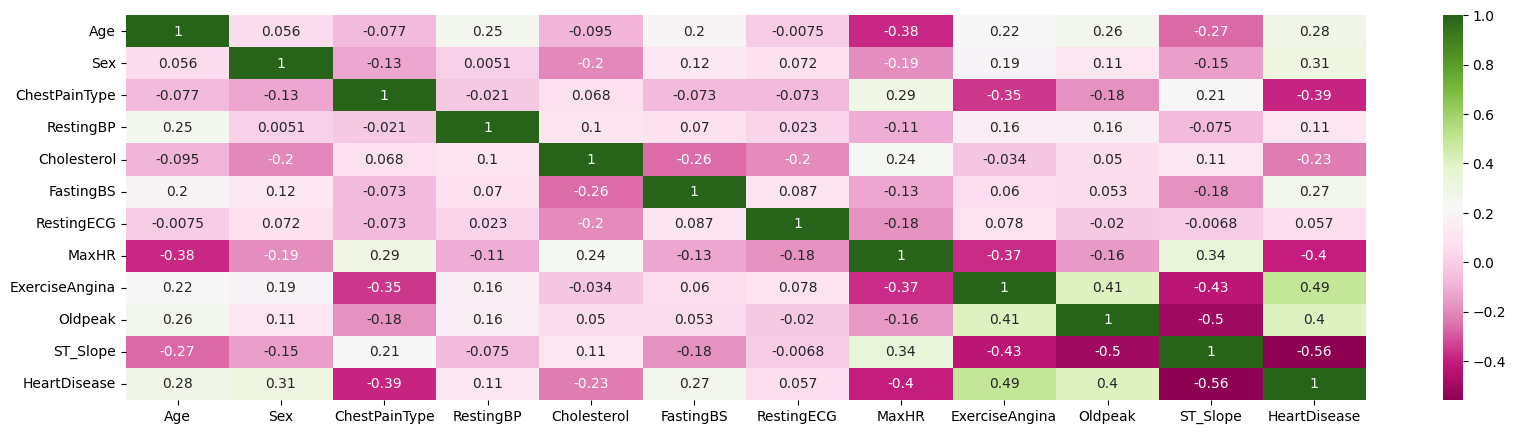

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),cmap = "PiYG",annot = True);

In [ ]:
curr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()

<Axes: >

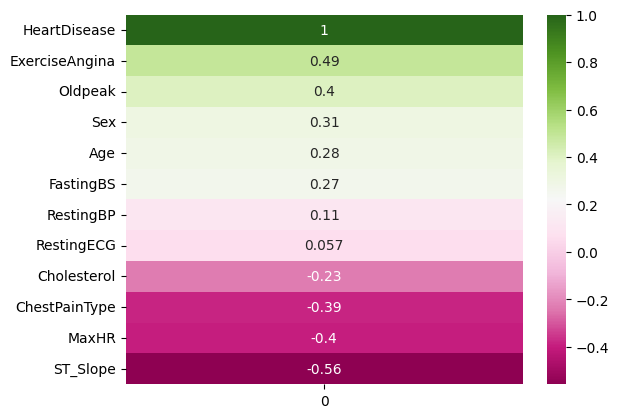

In [ ]:
sns.heatmap(curr ,cmap = 'PiYG' , annot = True)

In [ ]:
X = df.drop(df[['HeartDisease','RestingBP' , 'RestingECG']], axis = 1)
y = df['HeartDisease']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.33 , stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix  ,ConfusionMatrixDisplay


In [ ]:
def model(classifier):
    classifier.fit(X_train,y_train)
    global prediction
    prediction = classifier.predict(X_test)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))

In [ ]:
def conf_matrix(y_test , prediction , model_name):
  ax = plt.figure(figsize = (100,100))
  confu_matrix = confusion_matrix(y_test , prediction)
  disp = ConfusionMatrixDisplay(confu_matrix).plot()
  disp.ax_.set_title(model_name.upper())

In [ ]:
def classificationn_report( y_test , prediction , model_name):
  print(f"                     {model_name.upper()}")
  
  print(classification_report(y_test , prediction))


In [ ]:
LogisticRegression = LogisticRegression()

In [ ]:
model(LogisticRegression)

Accuracy :  87.79%


In [ ]:
classificationn_report( y_test ,  prediction , 'logistic regression')


                     LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       135
           1       0.87      0.92      0.89       168

    accuracy                           0.88       303
   macro avg       0.88      0.87      0.88       303
weighted avg       0.88      0.88      0.88       303



<Figure size 10000x10000 with 0 Axes>

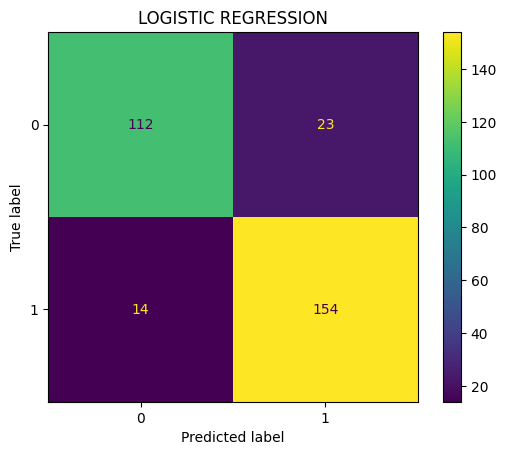

In [ ]:
conf_matrix( y_test , prediction ,  'logistic regression')


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier(max_depth =3)
model(DTC)


Accuracy :  84.82%


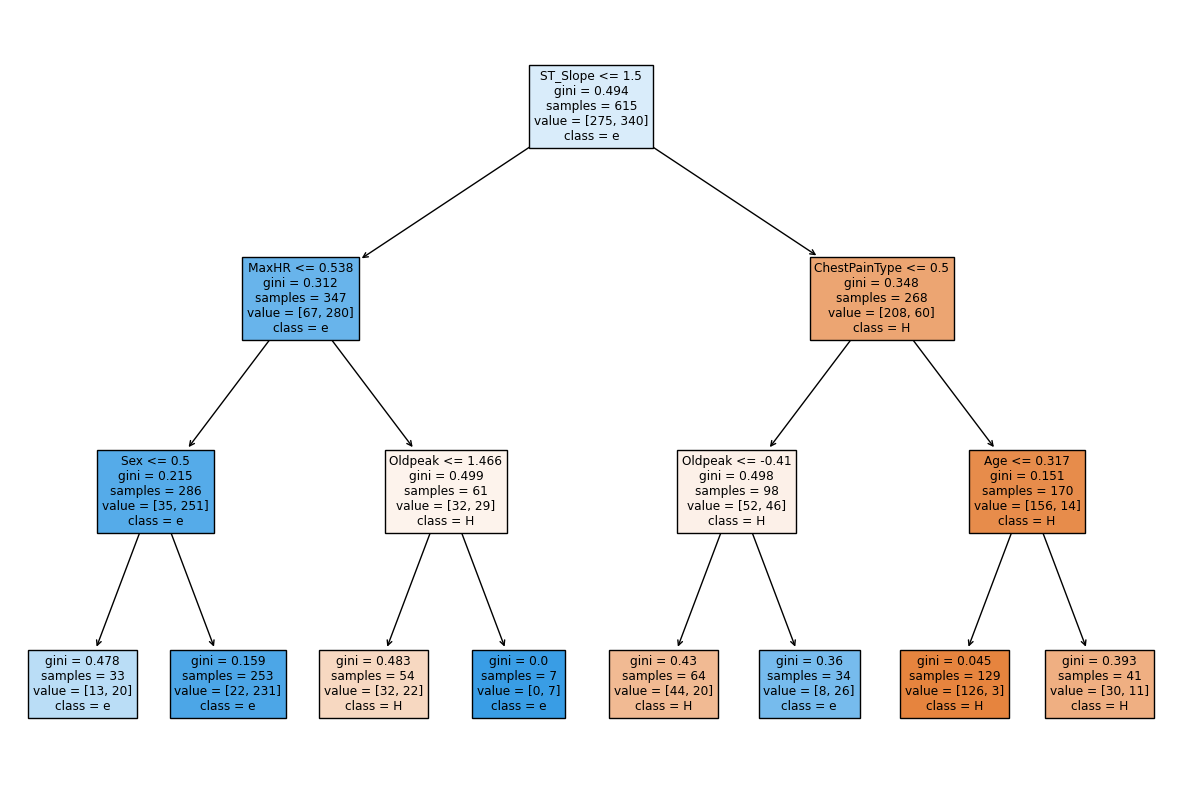

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTC, feature_names=X.columns, class_names= 'HeartDisease', filled=True)

In [ ]:
classificationn_report( y_test ,prediction , 'decision tree')

                     DECISION TREE
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       135
           1       0.86      0.86      0.86       168

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303



<Figure size 10000x10000 with 0 Axes>

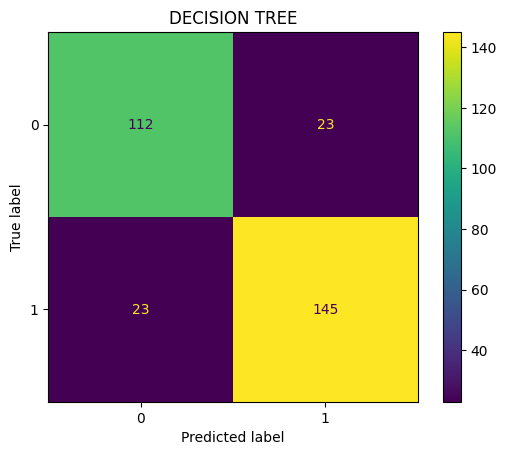

In [ ]:
conf_matrix( y_test , prediction , 'decision tree')

In [ ]:
from xgboost import XGBClassifier , plot_tree

In [ ]:
xgbc = XGBClassifier(max_depth=2)

In [ ]:
model(xgbc)

Accuracy :  88.12%


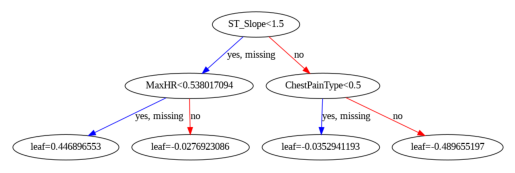

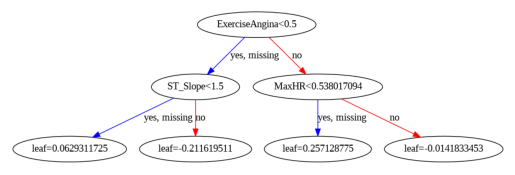

In [ ]:
plot_tree(xgbc); plt.show()
plot_tree(xgbc, num_trees=4); plt.show()


In [ ]:
classificationn_report( y_test , prediction , 'xgboost')

                     XGBOOST
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       135
           1       0.90      0.89      0.89       168

    accuracy                           0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303



<Figure size 10000x10000 with 0 Axes>

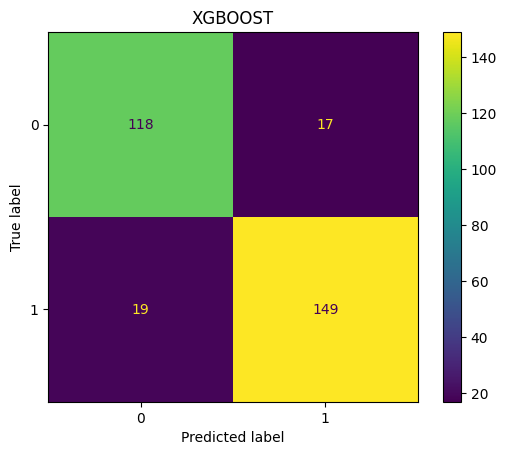

In [ ]:
conf_matrix( y_test , prediction , 'xgboost')
